**Emulate Albumin Data Analysis**


Paula Ramos Perez

2024 Summer Experience Student

6.12.24 - 8.9.24

In [326]:
import pandas as pd


In [327]:
import seaborn as sns

In [328]:
import matplotlib.pyplot as plt

In [329]:
from scipy.stats import ttest_ind


In organizing data, we reviewed over 10 studies conducted by John Stutz and Aaron Schmidlin. After organization, we sought only after 7 studies after careful consideration of the validity of values. 

**Important Notes**

Please note the studies used in this report, as well as their corresponding control chips and hepatocyte lots:

* D0214-87 | Chips 17,18,19,20,21 | Lot 566.03.04.05.0M

* D0944-109 | Chips 1,2,3,4,5,17,19,20,21 | Lot 566.03.04.05.0M

* D0216-96 |17,18,19,20,21 | Lot 566.03.04.05.0M

* DD00158-04 | 3,4,5,6,7 | Lot 566.03.03.05.0M

* DD1907-15 | 1,2,3,4,5,6 | Lot 566.03.03.05.0M

* DD01907-69 | 1,2,3 | Lot 566.03.02.05.0M

In [330]:
file_path = 'albumin_data.xlsx'

# reads multiple excel files

sheets_dict = pd.read_excel(file_path, sheet_name=None, header=0, index_col=0, engine='openpyxl')

# dictionary of control

control_chips_dict = {
    'D0214-87': [17,18,19,20,21],
    'D0944-109': [1,2,3,4,5,17,19,20,21],
    'D0216-96': [17,18,19,20,21],
    'DD00158-04': [3,4,5,6,7],
    'DD1907-15': [1,2,3,4,5,6],
    'DD01907-69': [1,2,3]
}

In [331]:
# dictionary of hepatocyte lots
hep_lot_dict = {
    'D0214-87': 'Lot 566.03.04.05.0M',
    'D0944-109': 'Lot 566.03.04.05.0M',
    'D0216-96': 'Lot 566.03.04.05.0M',
    'DD00158-04': 'Lot 566.03.03.05.0M',
    'DD1907-15': 'Lot 566.03.03.05.0M',
    'DD01907-69': 'Lot 566.04.02.05.0M'
}

**Descriptive Analysis & Visualization Per Study**

Below, you will see the following in this order:
* Descriptive analysis, per study
* Mean values by day, per study
* Standard error by day, per study
* Mean error bars, per study

In [332]:
# function to clean and analyze data for respective sheet + control chips

def cleanalyze(df, sheet_name, control_chips):
    if not len(control_chips):
        print(f"No control chips found for {sheet_name}. Skipping analysis.")
        return
    
    control_df = df[control_chips].copy()
    control_df.replace('#VALUE', pd.NA, inplace=True)
    control_df.apply(pd.to_numeric, errors='coerce')

    print(f"Descriptive Analysis of {sheet_name} Control Group")
    print(control_df.describe())

    #Visualization
    sns.set(style="whitegrid")
    plt.figure(figsize=(12,6))
    sns.lineplot(data=control_df)
    plt.title(f'Line Plot of Control Chip Data Over Days ({sheet_name})')
    plt.xlabel('Days')
    plt.ylabel('Values')
    plt.legend(title='Chip #', loc='upper right')
    plt.show()

    #Data Aggregation and Grouping
    mean_by_day = control_df.mean(axis=1)
    sem_by_day = control_df.sem(axis=1)
    print(f"Mean values By Day for Control Group {sheet_name}")
    print(mean_by_day)
    print(f"Standard Error By Day for Control Group {sheet_name}")
    print(sem_by_day)

    #Error bars
    plt.figure(figsize=(10, 5))
    mean_by_day.plot(kind='bar', yerr=sem_by_day, capsize=4) 
    plt.title(f'Mean Values by Day for Control Group ({sheet_name})')
    plt.xlabel('Days')
    plt.ylabel('Mean Value')
    plt.ylim(0, mean_by_day.max() * 1.1)  
    plt.show()


Descriptive Analysis of D0214-87 Control Group
              17         18         19         20         21
count  13.000000  13.000000  12.000000  13.000000  13.000000
mean   20.959103  21.143846  21.073333  17.983205  18.478974
std    14.082767  16.236645  11.742618  12.370201  12.233706
min     8.576667   6.941667   8.168333   6.071667   6.858333
25%     9.096667   9.290000  11.996667   9.170000   8.606667
50%    14.530000  15.460000  15.394167  11.701667  13.756667
75%    38.923333  21.358333  34.570000  28.870000  30.365000
max    42.751667  51.576667  38.091667  38.676667  40.411667


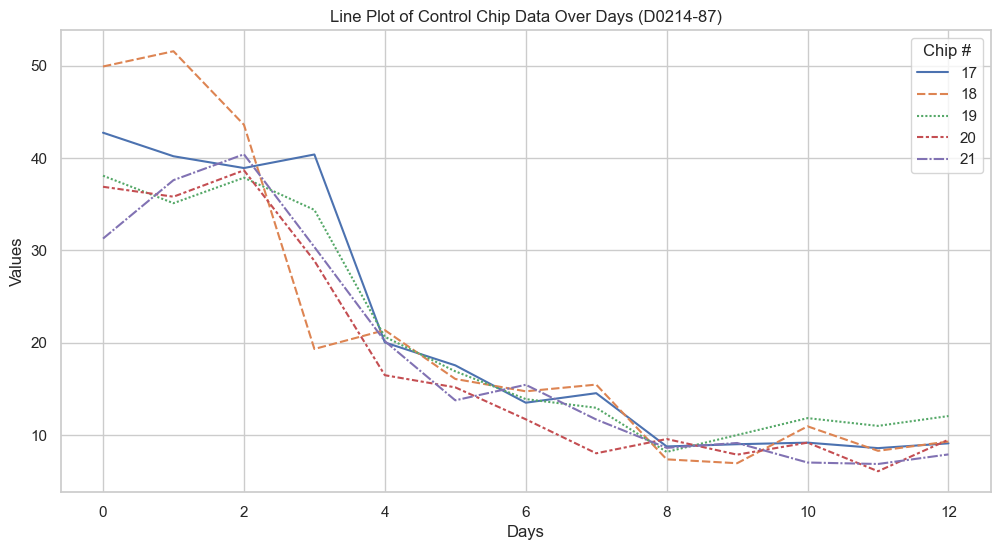

Mean values By Day for Control Group D0214-87
chip #
0     39.788000
1     40.064333
2     39.899667
3     30.667000
4     19.734000
5     15.886000
6     13.852667
7     12.526667
8      8.491333
9      8.236667
10     9.624667
11     8.155667
12     9.566000
dtype: float64
Standard Error By Day for Control Group D0214-87
chip #
0     3.124205
1     3.009088
2     1.014626
3     3.467653
4     0.846871
5     0.666036
6     0.634387
7     1.300983
8     0.361802
9     0.516491
10    0.830089
11    0.843643
12    0.681000
dtype: float64


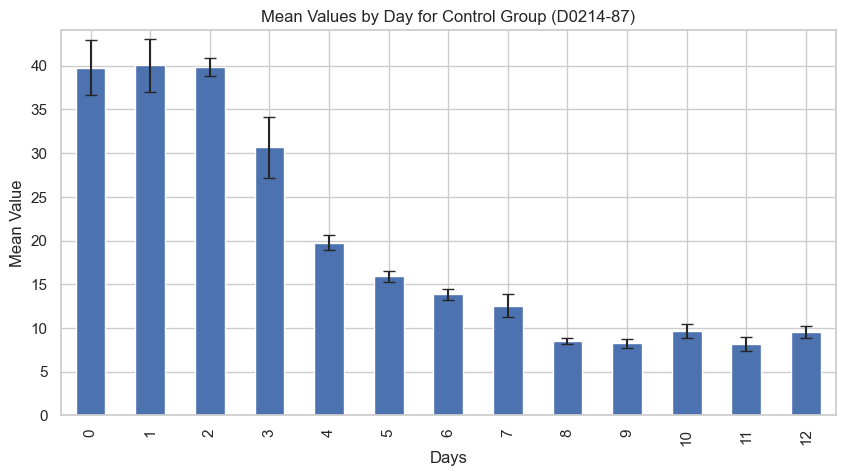

Descriptive Analysis of D0944-109 Control Group
               1          2          3          4          5         17  \
count   8.000000   8.000000   8.000000   8.000000   8.000000   8.000000   
mean   38.900590  24.643417  36.116200  30.992408  25.499525  42.290131   
std    10.194937   8.096210  11.595920   9.550091   5.379735  12.909631   
min    19.650517  14.456433  21.935800  17.898567  17.974833  20.858017   
25%    35.817933  18.313713  28.034671  25.796471  22.074592  33.001058   
50%    38.026325  24.515325  34.774042  29.386817  25.156483  46.713175   
75%    44.732779  30.122850  41.282271  36.129408  30.438854  49.823608   
max    52.467733  38.247267  56.733783  46.698683  31.713450  59.705050   

              19         20         21  
count   8.000000   8.000000   8.000000  
mean   48.458956  39.935123  31.555544  
std    20.291159  14.495255   9.950872  
min    20.404283  14.012517  18.580083  
25%    35.839646  33.103238  24.934679  
50%    46.245817  41.192192  2

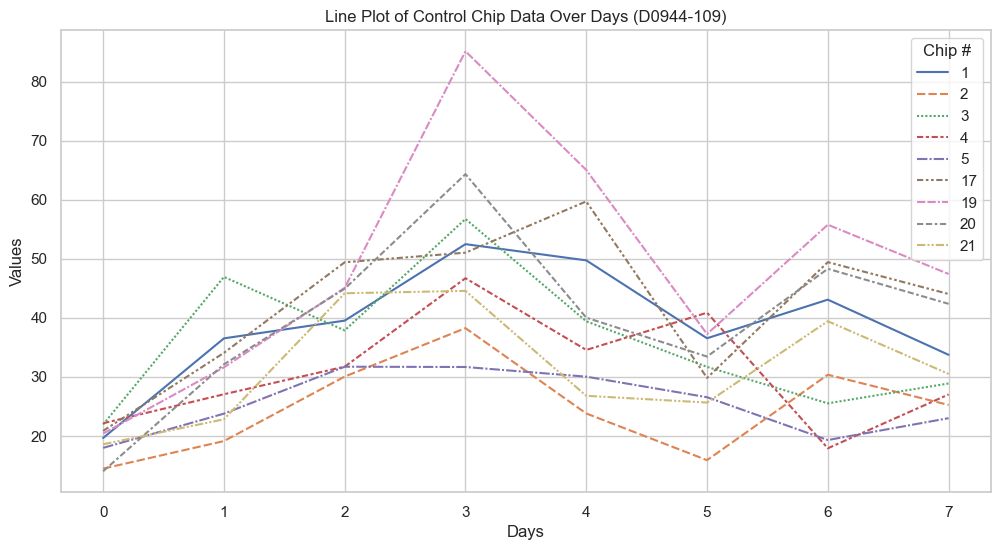

Mean values By Day for Control Group D0944-109
Chip #
0    18.890324
1    30.440456
2    39.378726
3    52.316752
4    41.004594
5    30.851394
6    36.559357
7    33.573413
dtype: float64
Standard Error By Day for Control Group D0944-109
Chip #
0    0.992798
1    2.809075
2    2.336719
3    5.215421
4    4.811280
5    2.503740
6    4.608376
7    2.967723
dtype: float64


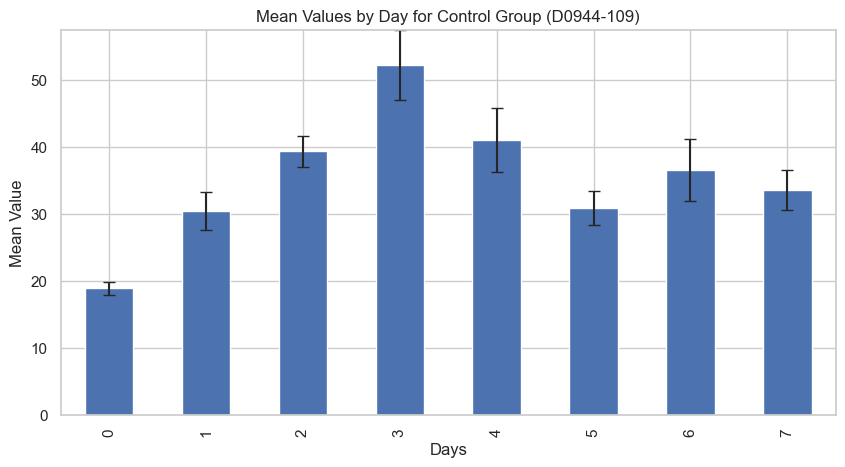

No control chips found for D0214-96. Skipping analysis.
Descriptive Analysis of DD00158-04 Control Group
               3          4          5          6          7
count  15.000000  15.000000  15.000000  15.000000  15.000000
mean   13.385000   8.249778   7.056889   5.717565   5.332444
std     7.891150   3.626989   3.438507   5.605872   2.451471
min     5.356667   3.398333   2.701667   0.413343   1.740000
25%     7.475833   5.436667   4.835833   1.774183   3.930000
50%    10.700000   8.265000   6.265000   2.793333   4.853333
75%    18.274167  10.251667   8.184167   8.978333   7.000000
max    29.543333  16.545000  14.623333  20.231667   9.930000


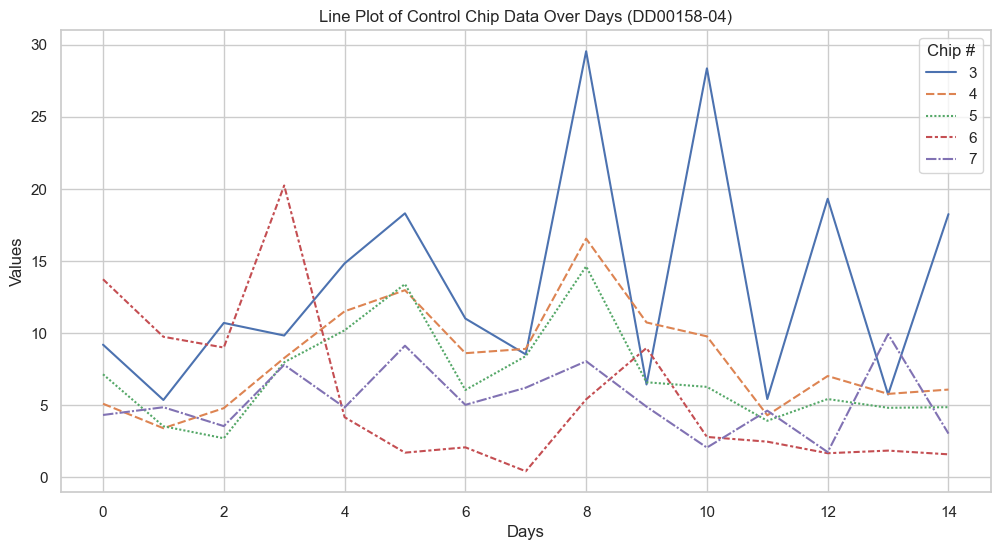

Mean values By Day for Control Group DD00158-04
Chip #
0      7.894000
1      5.376333
2      6.145667
3     10.817333
4      9.103333
5     11.098340
6      6.549354
7      6.488002
8     14.831333
9      7.521000
10     9.848000
11     4.142000
12     7.031000
13     5.620667
14     6.758667
dtype: float64
Standard Error By Day for Control Group DD00158-04
Chip #
0     1.687100
1     1.153790
2     1.570386
3     2.380945
4     2.028798
5     2.764519
6     1.528183
7     1.590244
8     4.209622
9     1.033817
10    4.826561
11    0.487304
12    3.242001
13    1.294470
14    2.972747
dtype: float64


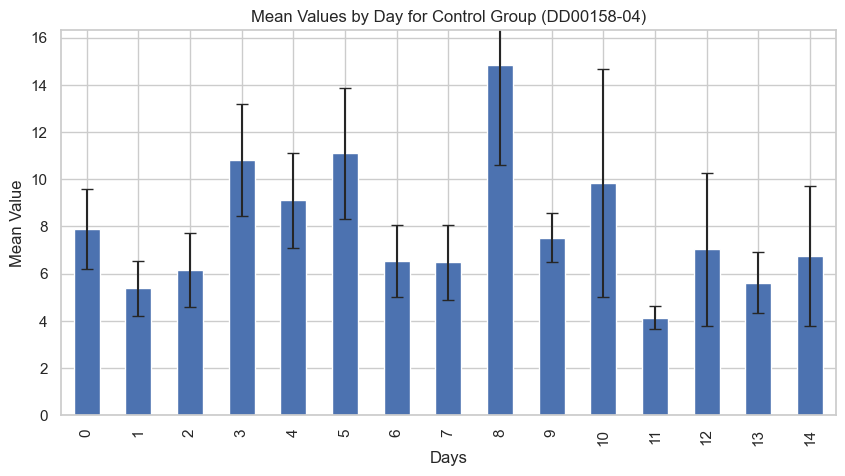

No control chips found for D00158-28. Skipping analysis.
Descriptive Analysis of DD1907-15 Control Group
               1          2          3          4          5          6
count   8.000000   8.000000   7.000000   8.000000   8.000000   8.000000
mean   21.150208  27.925000  36.377381  29.813958  32.996250  28.110208
std     7.808167  10.780262  22.808209  11.579233  14.828824  16.158517
min    13.258333  15.800000   2.460000  14.691667  13.603333  11.390000
25%    14.730417  20.313333  25.227500  19.944167  19.774583  15.234167
50%    19.245000  23.965000  33.830000  30.515833  34.204167  26.130000
75%    25.707500  35.422917  49.552500  41.456667  44.299583  34.115833
max    33.651667  44.741667  68.791667  41.515000  51.848333  57.898333


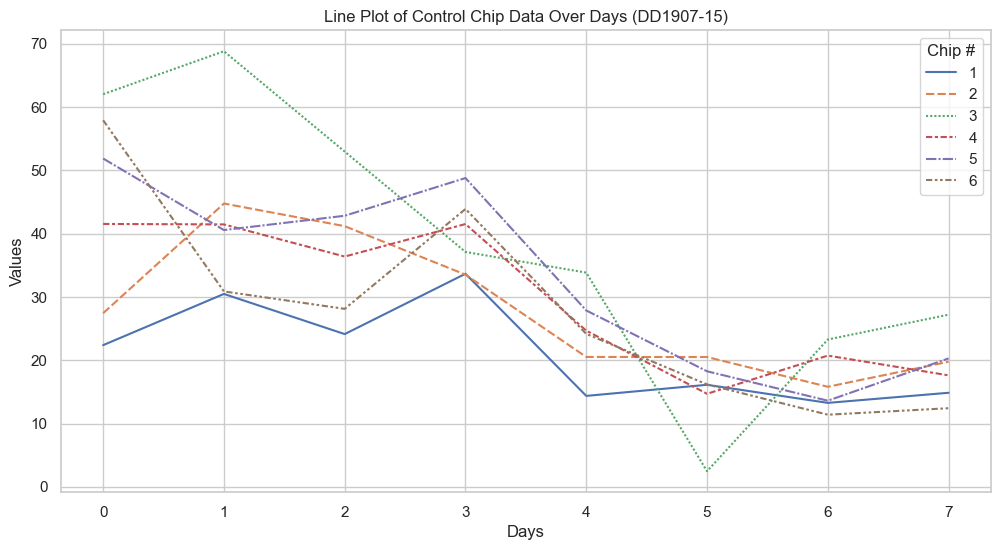

Mean values By Day for Control Group DD1907-15
Chip #
0    43.844444
1    42.809167
2    34.514667
3    39.735278
4    24.228333
5    14.697778
6    16.340000
7    18.683889
dtype: float64
Standard Error By Day for Control Group DD1907-15
Chip #
0    6.651916
1    5.718208
2    3.644000
3    2.481003
4    2.687731
5    2.583386
6    1.905688
7    2.090993
dtype: float64


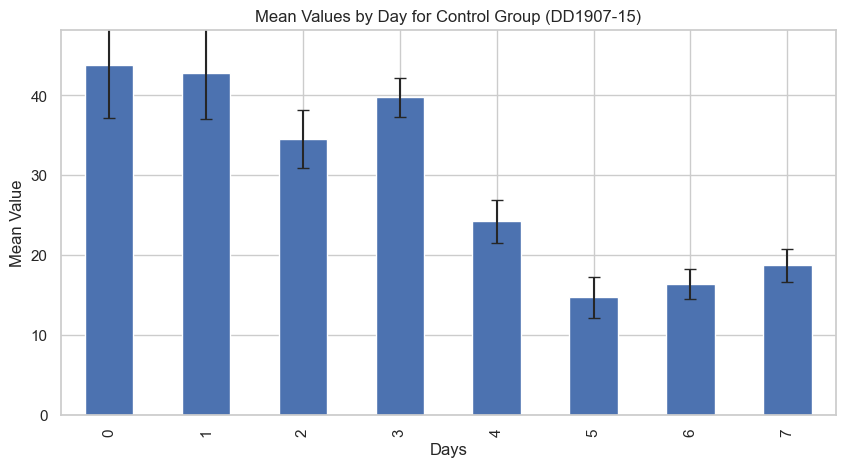

Descriptive Analysis of DD01907-69 Control Group
               1          2          3
count   4.000000   4.000000   4.000000
mean   45.568333  47.980000  51.988333
std    19.812541  16.005885  24.448538
min    21.695000  24.613333  16.505000
25%    37.031250  44.620833  47.281250
50%    45.396667  53.505000  59.616667
75%    53.933750  56.864167  64.323750
max    69.785000  60.296667  72.215000


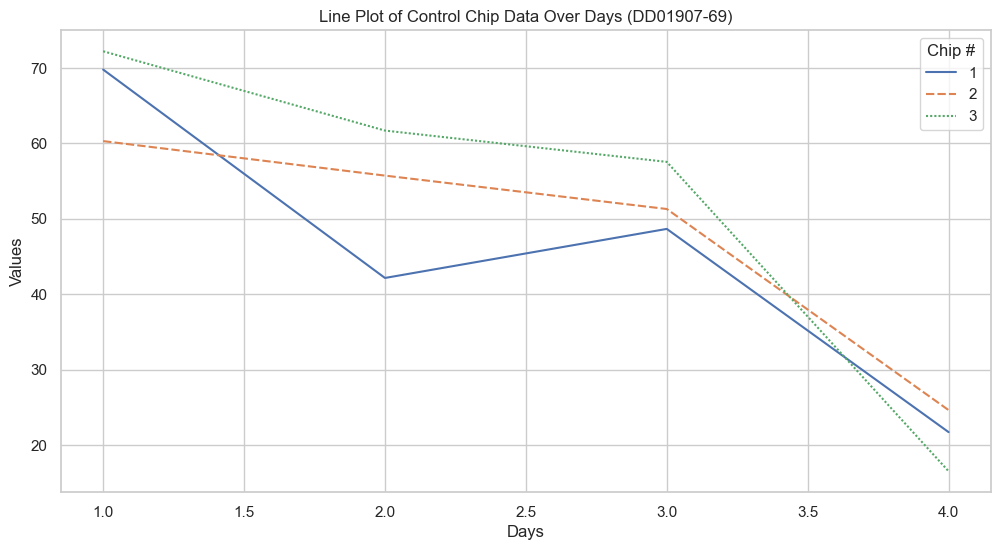

Mean values By Day for Control Group DD01907-69
Chip#
1    67.432222
2    53.185556
3    52.493333
4    20.937778
dtype: float64
Standard Error By Day for Control Group DD01907-69
Chip#
1    3.636085
2    5.784121
3    2.635908
4    2.371097
dtype: float64


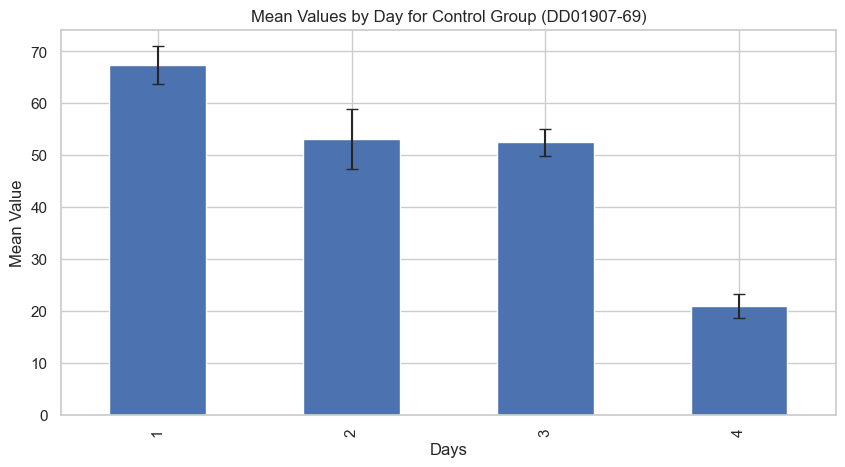

In [333]:
#Iterate over each sheet and perform analysis for control chips

for sheet_name, df in sheets_dict.items():
    control_chips = control_chips_dict.get(sheet_name, [])
    cleanalyze(df, sheet_name, control_chips)

**Data Visualization Per Hepatocyte Lot**

In [334]:
# Function to aggregate data per hepatocyte lot
def plot_per_lot(sheets_dict, control_chips_dict, hep_lot_dict):
    lots_data = {}
    
    # Aggregate data by lot
    for sheet_name, df in sheets_dict.items():
        control_chips = control_chips_dict.get(sheet_name, [])
        lot = hep_lot_dict.get(sheet_name, 'Unknown Lot')
        if lot not in lots_data:
            lots_data[lot] = []
        if control_chips:
            lot_df = df[control_chips].copy()
            lot_df.replace('#VALUE', pd.NA, inplace=True)
            lot_df = lot_df.apply(pd.to_numeric, errors='coerce')
            lots_data[lot].append(lot_df)

    # Plot data for each lot
    for lot, dfs in lots_data.items():
        if not dfs:
            print(f"No data in this lot")
            continue
        combined_df = pd.concat(dfs, axis=1)
         # Visualization: Line Plot for Each Lot
        sns.set(style="whitegrid")
        plt.figure(figsize=(12,6))
        sns.lineplot(data=combined_df)
        plt.title(f'Line Plot of Data Over Days for {lot}')
        plt.xlabel('Days')
        plt.ylabel('Values')
        plt.legend(title='Chip #', loc='upper right')
        plt.show()

        # Data Aggregation and Grouping
        mean_by_day = combined_df.mean(axis=1)
        sem_by_day = combined_df.sem(axis=1)

        # Error Bars
        plt.figure(figsize=(10, 5))
        mean_by_day.plot(kind='bar', yerr=sem_by_day, capsize=4)
        plt.title(f'Mean Values by Day for {lot}')
        plt.xlabel('Days')
        plt.ylabel('Mean Value')
        plt.ylim(0, mean_by_day.max() * 1.1)
        plt.show()
        cleanalyze(combined_df, 'Combined Data', combined_df.columns)
        


**Cumulative Data Visualization**

In [335]:
def plot_all(sheets_dict, control_chips_dict):
    all_data = []
    
    # Aggregate all data
    for sheet_name, df in sheets_dict.items():
        control_chips = control_chips_dict.get(sheet_name, [])
        if control_chips:
            df_filtered = df[control_chips].copy()
            df_filtered.replace('#VALUE', pd.NA, inplace=True)
            df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')
            all_data.append(df_filtered)
    
    if not all_data:
        print("No data available to plot.")
        return
    
    combined_df = pd.concat(all_data, axis=1)
    
    overall_mean = combined_df.mean(axis=1)

    # Visualization: Line Plot for Overall Data
    sns.set(style="whitegrid")
    plt.figure(figsize=(12,6))
    sns.lineplot(data=overall_mean)
    plt.title('Overall Mean Line Plot of Control Chip Data Over Days')
    plt.xlabel('Days')
    plt.ylabel('Mean Values')
    plt.show()

    # Data Aggregation and Grouping for Error Bars
    sem_by_day = combined_df.sem(axis=1)

    # Error Bars
    plt.figure(figsize=(10, 5))
    overall_mean.plot(kind='bar', yerr=sem_by_day, capsize=4)
    plt.title('Overall Mean Values by Day for Control Chips')
    plt.xlabel('Days')
    plt.ylabel('Mean Value')
    plt.ylim(0, overall_mean.max() * 1.1)
    plt.show()


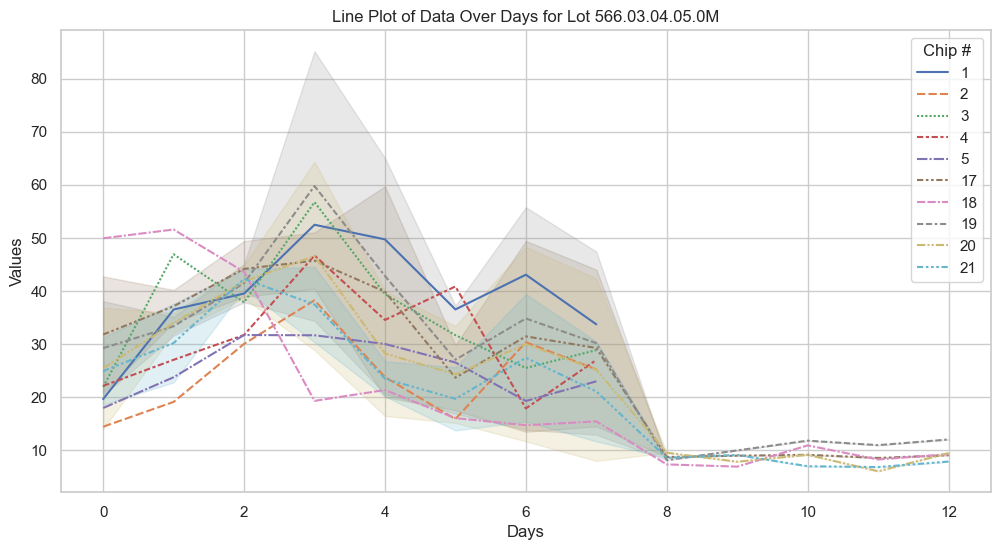

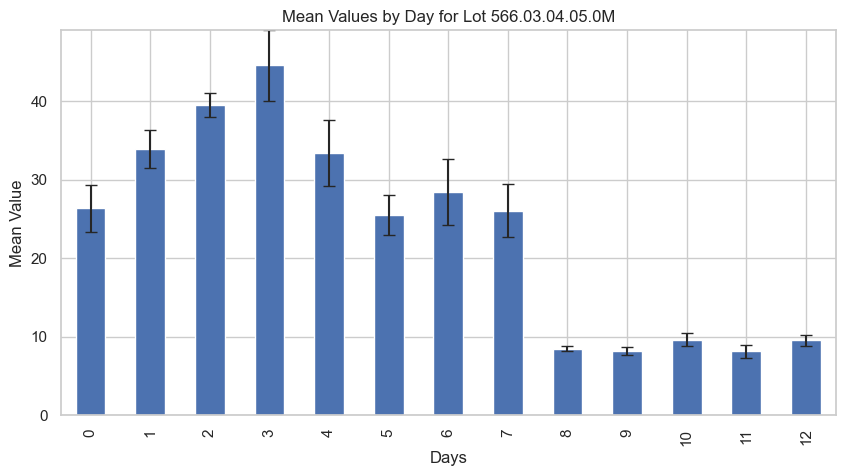

Descriptive Analysis of Combined Data Control Group
              17         17         18         19         19         20  \
count  13.000000   8.000000  13.000000  12.000000   8.000000  13.000000   
mean   20.959103  42.290131  21.143846  21.073333  48.458956  17.983205   
std    14.082767  12.909631  16.236645  11.742618  20.291159  12.370201   
min     8.576667  20.858017   6.941667   8.168333  20.404283   6.071667   
25%     9.096667  33.001058   9.290000  11.996667  35.839646   9.170000   
50%    14.530000  46.713175  15.460000  15.394167  46.245817  11.701667   
75%    38.923333  49.823608  21.358333  34.570000  58.076721  28.870000   
max    42.751667  59.705050  51.576667  38.091667  85.133233  38.676667   

              20         21         21         1   ...         4          5   \
count   8.000000  13.000000   8.000000   8.000000  ...   8.000000   8.000000   
mean   39.935123  18.478974  31.555544  38.900590  ...  30.992408  25.499525   
std    14.495255  12.233706   9.

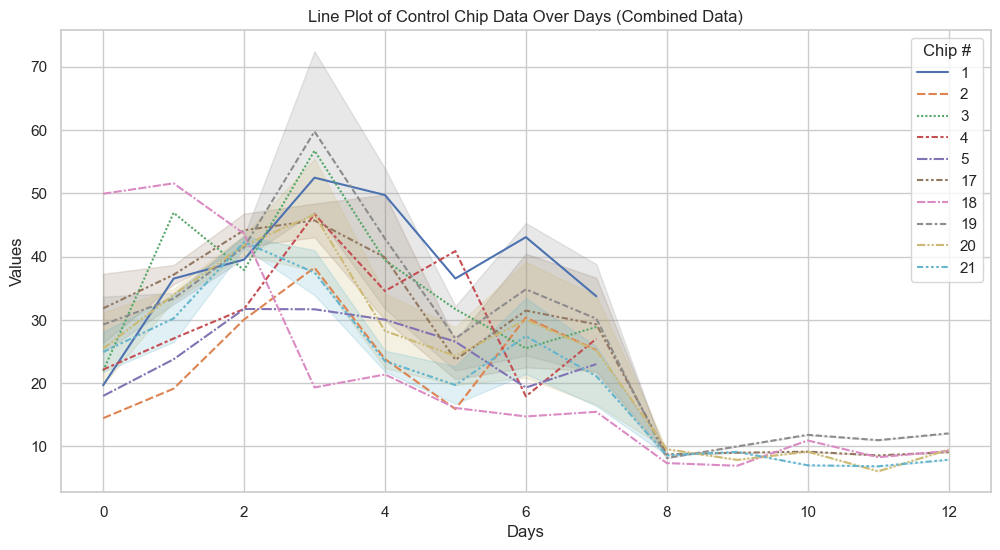

Mean values By Day for Control Group Combined Data
0     26.901037
1     33.800955
2     40.606281
3     45.601700
4     33.480103
5     24.845436
6     29.351132
7     26.194334
8      8.617037
9      8.421667
10     9.478704
11     8.141296
12     9.596667
dtype: float64
Standard Error By Day for Control Group Combined Data
0     2.318591
1     1.636185
2     1.112980
3     3.701150
4     3.518067
5     1.958707
6     3.531458
7     2.939937
8     0.230154
9     0.326806
10    0.596802
11    0.628609
12    0.506428
dtype: float64


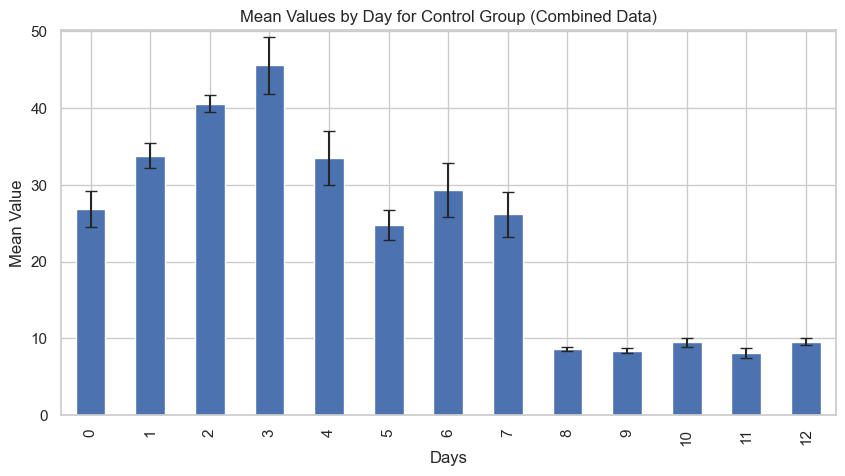

No data in this lot


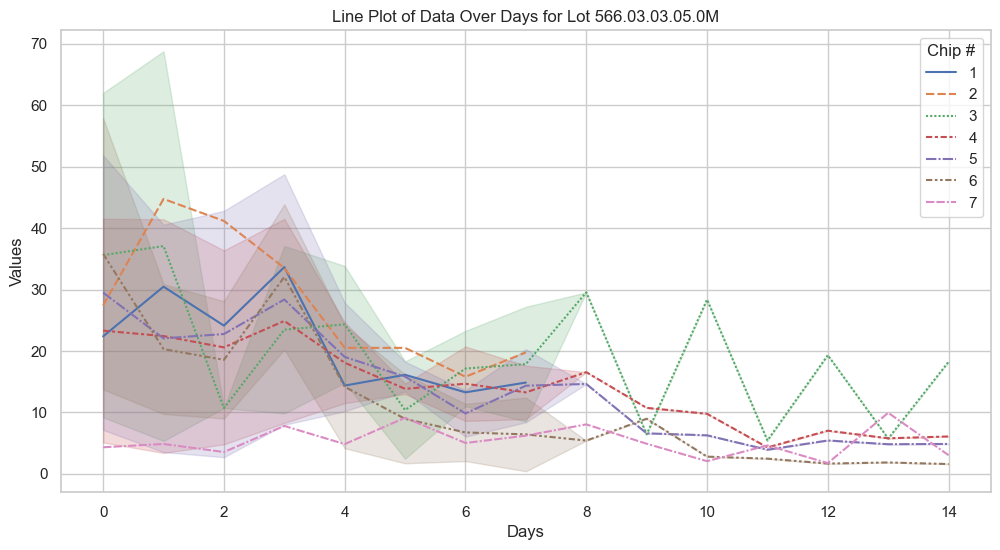

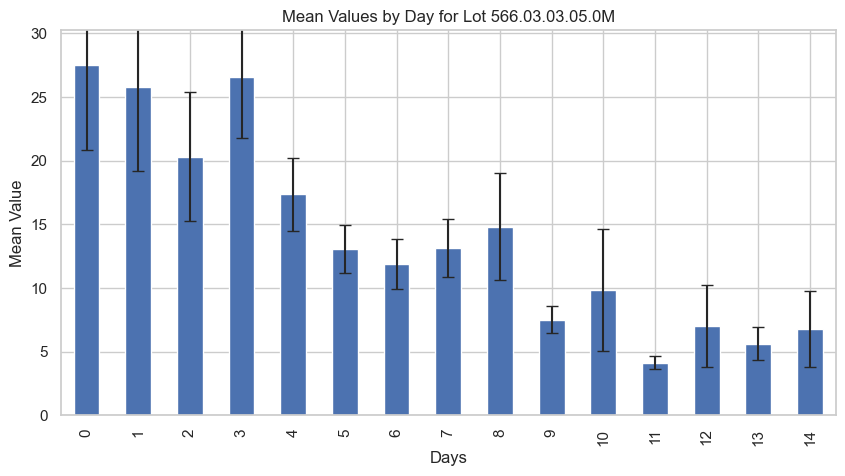

Descriptive Analysis of Combined Data Control Group
               3          3          4          4          5          5  \
count  15.000000   7.000000  15.000000   8.000000  15.000000   8.000000   
mean   13.385000  36.377381   8.249778  29.813958   7.056889  32.996250   
std     7.891150  22.808209   3.626989  11.579233   3.438507  14.828824   
min     5.356667   2.460000   3.398333  14.691667   2.701667  13.603333   
25%     7.475833  25.227500   5.436667  19.944167   4.835833  19.774583   
50%    10.700000  33.830000   8.265000  30.515833   6.265000  34.204167   
75%    18.274167  49.552500  10.251667  41.456667   8.184167  44.299583   
max    29.543333  68.791667  16.545000  41.515000  14.623333  51.848333   

               6          6          7          1          2          3  \
count  15.000000   8.000000  15.000000   8.000000   8.000000  15.000000   
mean    5.717565  28.110208   5.332444  21.150208  27.925000  13.385000   
std     5.605872  16.158517   2.451471   7.8081

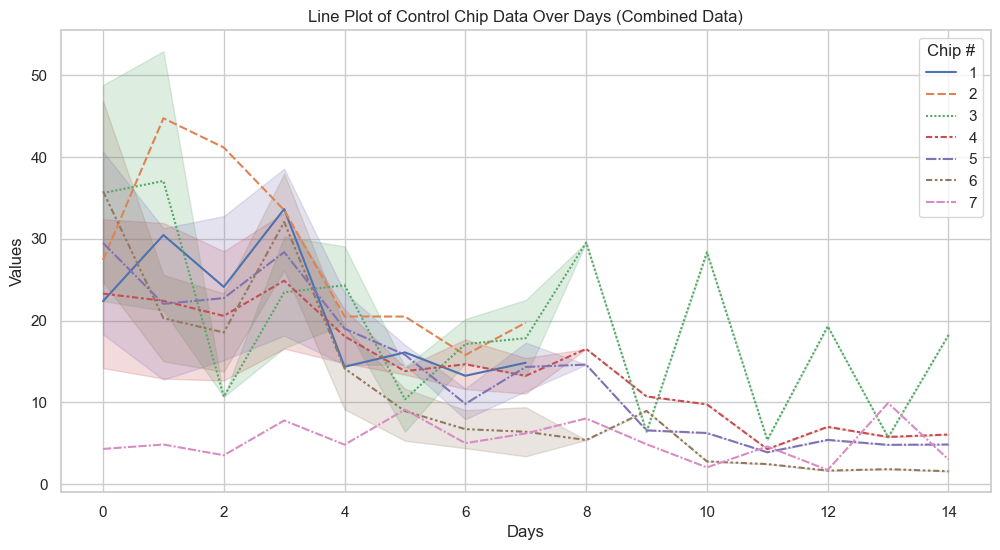

Mean values By Day for Control Group Combined Data
Chip #
0     28.997807
1     25.653333
2     19.868922
3     26.844474
4     18.003596
5     12.717021
6     11.973520
7     13.066931
8     15.585556
9      7.813148
10    10.713889
11     4.089444
12     7.618889
13     5.141852
14     7.173519
dtype: float64
Standard Error By Day for Control Group Combined Data
Chip #
0     5.189967
1     5.083630
2     3.796208
3     3.709120
4     2.204621
5     1.424893
6     1.500151
7     1.777027
8     3.022233
9     0.697909
10    3.464801
11    0.358431
12    2.325336
13    0.802707
14    2.166666
dtype: float64


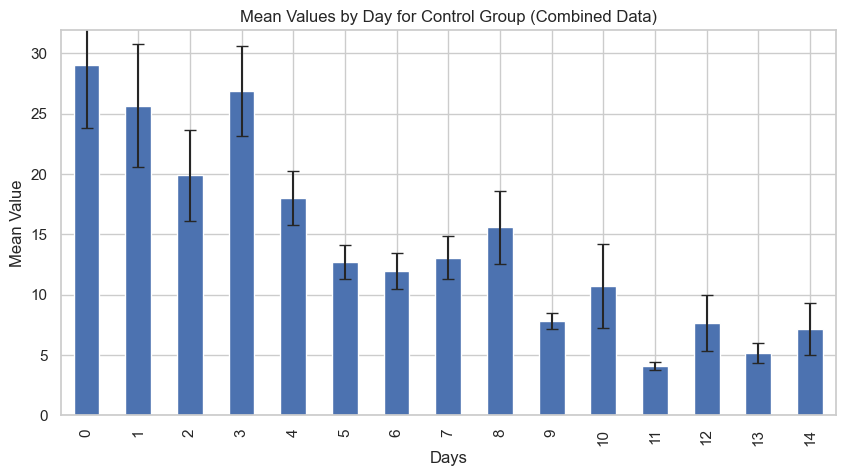

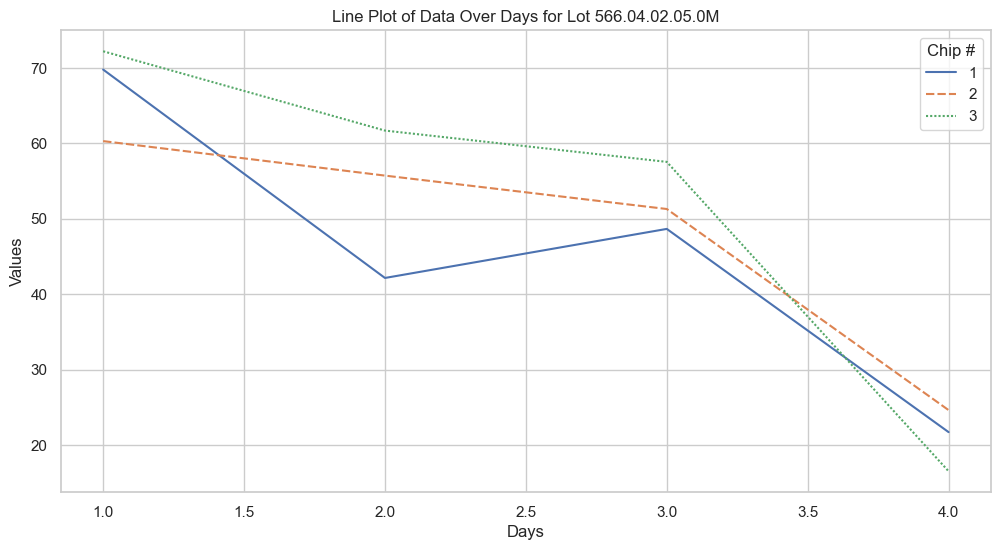

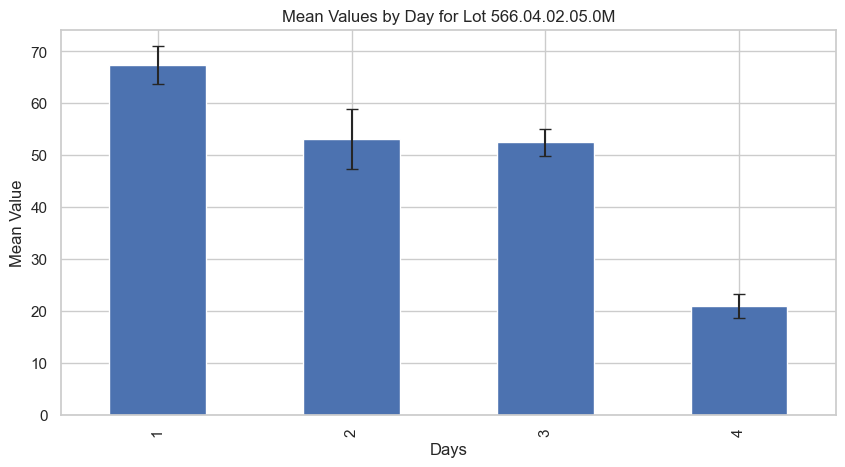

Descriptive Analysis of Combined Data Control Group
               1          2          3
count   4.000000   4.000000   4.000000
mean   45.568333  47.980000  51.988333
std    19.812541  16.005885  24.448538
min    21.695000  24.613333  16.505000
25%    37.031250  44.620833  47.281250
50%    45.396667  53.505000  59.616667
75%    53.933750  56.864167  64.323750
max    69.785000  60.296667  72.215000


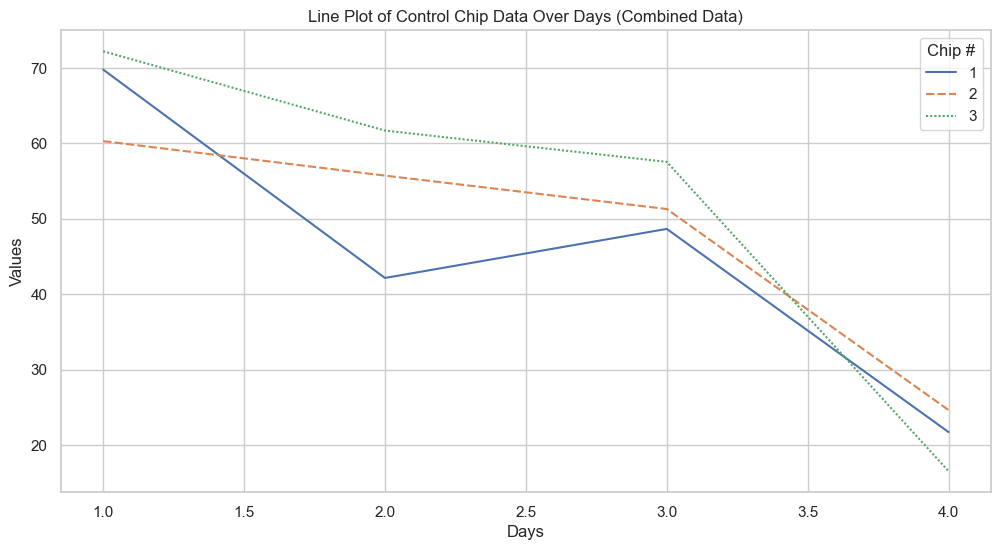

Mean values By Day for Control Group Combined Data
Chip#
1    67.432222
2    53.185556
3    52.493333
4    20.937778
dtype: float64
Standard Error By Day for Control Group Combined Data
Chip#
1    3.636085
2    5.784121
3    2.635908
4    2.371097
dtype: float64


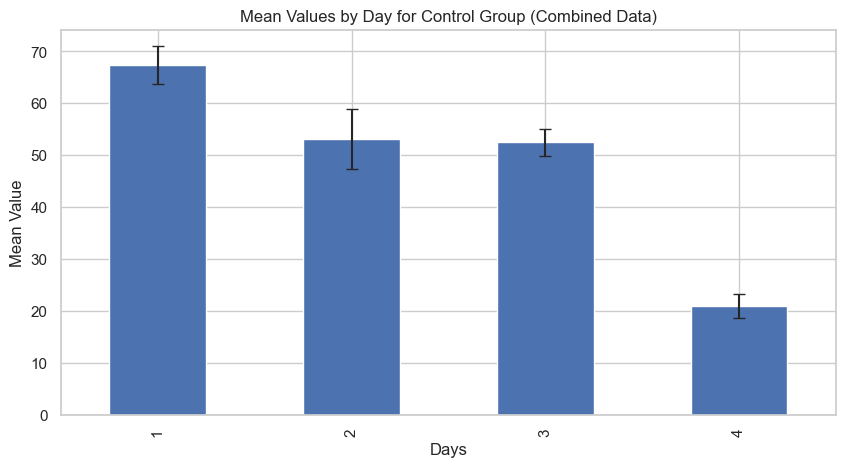

In [336]:
plot_per_lot(sheets_dict, control_chips_dict, hep_lot_dict)

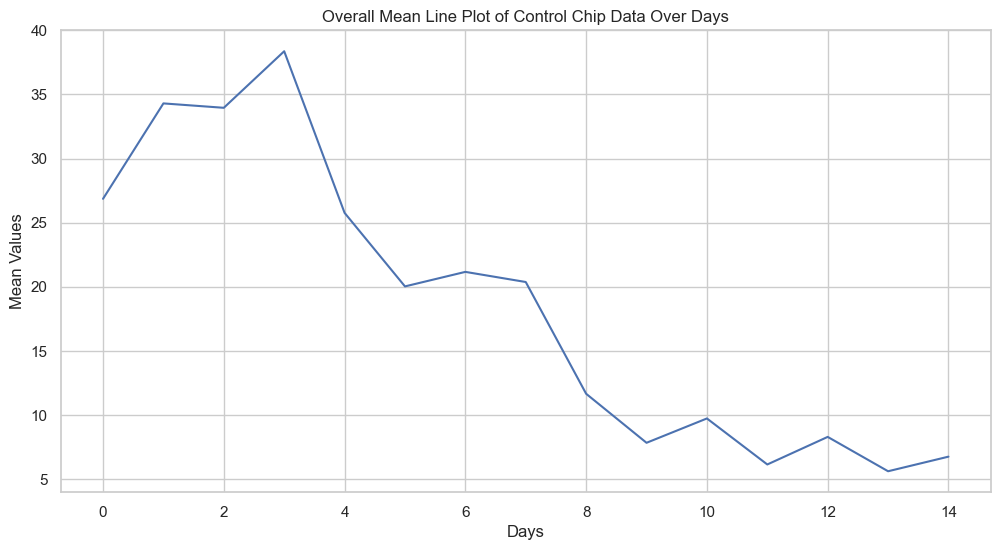

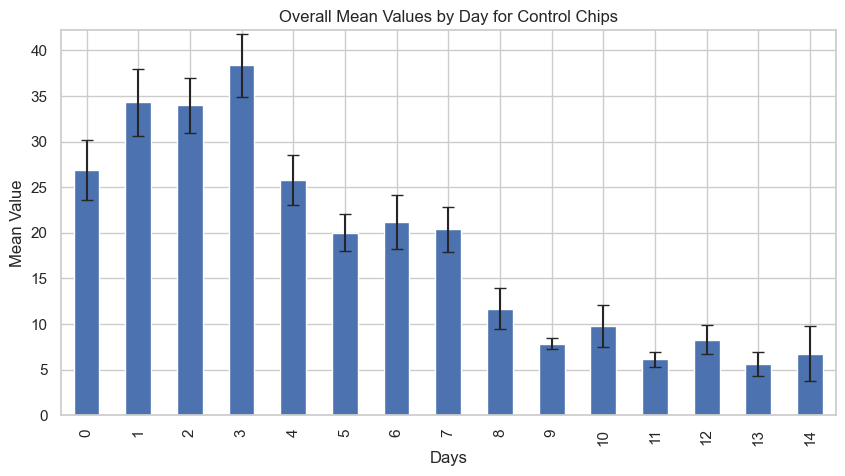

In [337]:
plot_all(sheets_dict, control_chips_dict)